In [2]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [3]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Bootstrap Partial Dependence

In [3]:
boot_num = 50

In [4]:
bootstrap_main(df, grid_size, boot_num, do_par = True)

the plot for this is in `partial_dependence_R`

# 2D Partial Dependence

Fit a GBRF to the entire dataset and plot the 2D partial dependence for selected features

In [4]:
# fit the gbrf
from sklearn import preprocessing
df_x, target = prepare_lst_prediction(df)
# df_x  = subset_regression_data(df_x, df_x)[0]
vars_drop = ['city','holdout','x','y']
df_x = df_x.drop(vars_drop, axis=1)
# le = preprocessing.LabelEncoder()
# le.fit(cities)
# list(le.classes_)
# le.transform(df_x.city) 
# df_x.city =le.transform(df_x.city) 
gbm_night = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night.fit(df_x, target['lst_night_mean'])
gbm_day = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day.fit(df_x, target['lst_day_mean'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=3201,
             subsample=1.0, verbose=0, warm_start=False)

In [35]:
df_vars = list(df_x)

In [53]:
XX

array([[-1.23164024, -1.16848968, -1.10533912, ...,  1.73643605,
         1.79958661,  1.86273716],
       [-1.23164024, -1.16848968, -1.10533912, ...,  1.73643605,
         1.79958661,  1.86273716],
       [-1.23164024, -1.16848968, -1.10533912, ...,  1.73643605,
         1.79958661,  1.86273716],
       ...,
       [-1.23164024, -1.16848968, -1.10533912, ...,  1.73643605,
         1.79958661,  1.86273716],
       [-1.23164024, -1.16848968, -1.10533912, ...,  1.73643605,
         1.79958661,  1.86273716],
       [-1.23164024, -1.16848968, -1.10533912, ...,  1.73643605,
         1.79958661,  1.86273716]])

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


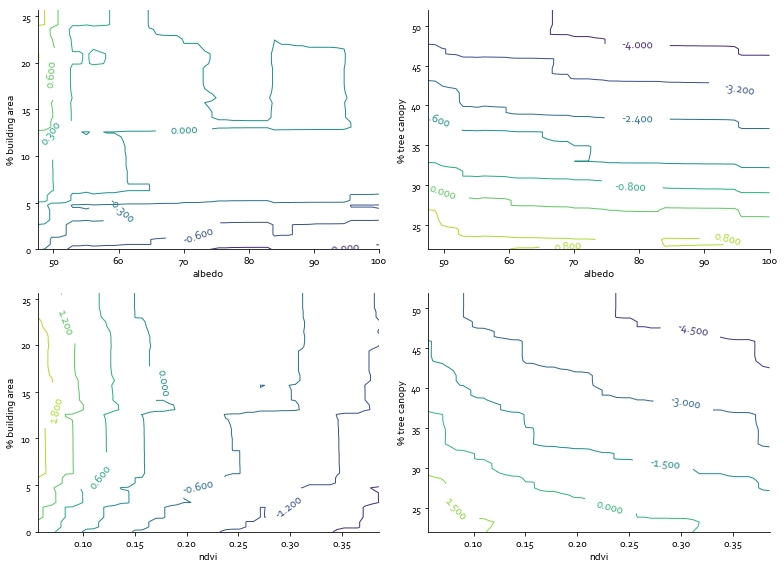

In [55]:
# two way partial dependence
figs, axes = plt.subplots(2, 2, figsize = (11,8), sharey=False, sharex=False)

# loop through the top n variables by nocturnal importance

features = [(1,4),(1,5),(0,4),(0,5)]

normalize_parameters = pd.read_csv('data/normalization_parameters_{}.csv'.format(grid_size))
normalize_parameters = normalize_parameters.set_index('feature')

for i in range(len(features)):
    plot_row = floor(i/2)
    left_right = np.mod(i,2)
    # calculate the partial dependence
    pdp, ax = partial_dependence(gbm_night, features[i], X = df_x,
                        grid_resolution = 50)
    # get data
    XX, YY = np.meshgrid(ax[0], ax[1])
    Z = pdp[0].reshape(list(map(np.size, ax))).T
    # unnormalize
    feature_x = df_vars[features[i][0]]
    feature_y = df_vars[features[i][1]]
    XX = XX*normalize_parameters.loc[feature_x,'sd'] + normalize_parameters.loc[feature_x,'mean']
    YY = YY*normalize_parameters.loc[feature_y,'sd'] + normalize_parameters.loc[feature_y,'mean']

    # add the line to the plot
    CS = axes[plot_row, left_right].contour(XX,YY,Z)#, levels=np.arange(-8,4,1))
    axes[plot_row, left_right].clabel(CS, inline=True, fontsize=12)
    # title and axis labels
    axes[plot_row, left_right].set_xlabel(feature_names[feature_x])
    axes[plot_row, left_right].set_ylabel(feature_names[feature_y])

In [34]:
feature_names[features[i][0]]

KeyError: 1

In [33]:
Z.shape

(50, 50)

In [ ]:
feature = 0
features = ['']
levels_set = False
for city in cities:
    left_right = 0
    for period in ['nocturnal', 'diurnal']:
        gbm = reg_gbm[period][city]
        # calculate the partial dependence
        pdp, ax = partial_dependence(gbm, (0, 1), X = X_train[city],
                                grid_resolution = 50)
        # get data
        XX, YY = np.meshgrid(ax[0], ax[1])
        Z = pdp[0].reshape(list(map(np.size, ax))).T
        # add the line to the plot
        CS = axes[feature, left_right].contour(XX,YY,Z, levels=np.arange(-8,4,1))
        axes[feature, left_right].clabel(CS, inline=True, fontsize=8)
        # title and axis labels
        axes[feature, left_right].set_title('{} {}'.format(period,city))
        plt.xlabel('Canopy cover')
        plt.ylabel('NDVI')
        left_right += 1
    feature += 1
    